In [1]:
%load_ext autoreload
%autoreload 2

from cr39py.track_overlap_mc import MonteCarloTrackOverlap
import numpy as np
import matplotlib.pyplot as plt

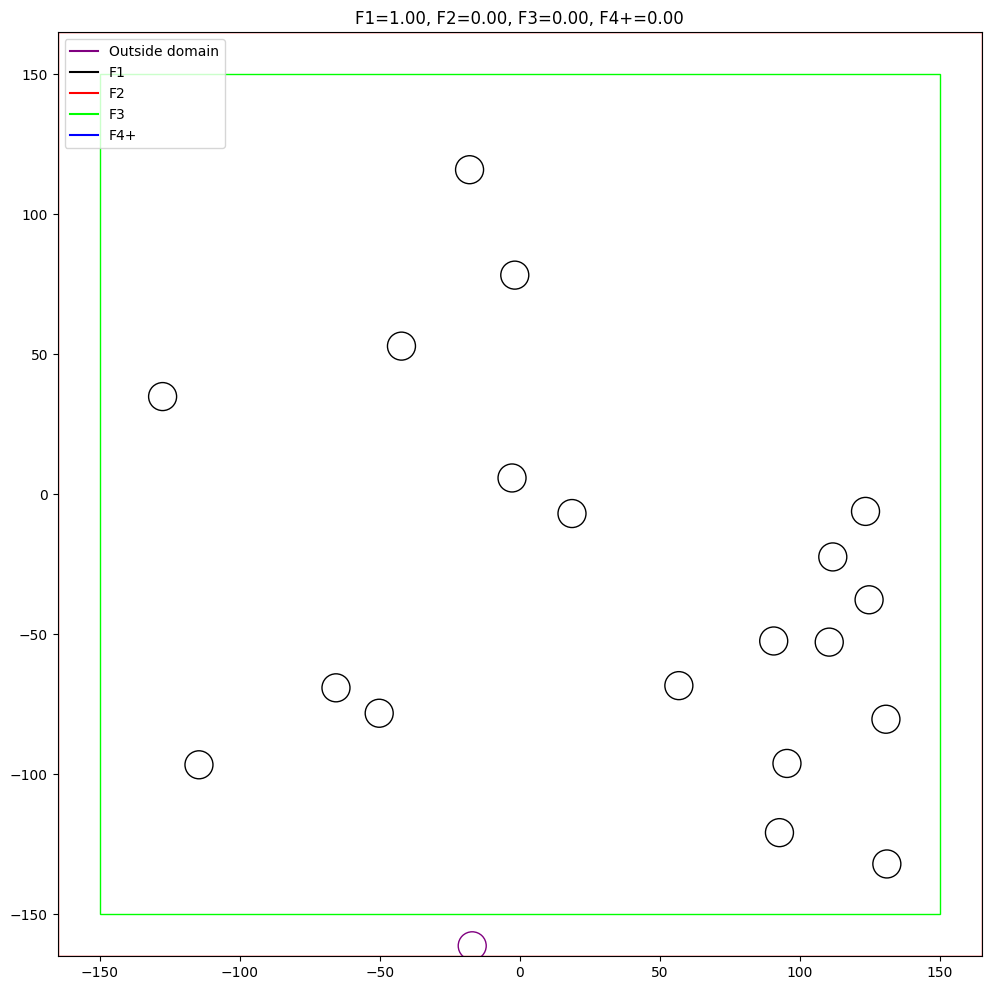

In [132]:
mc = MonteCarloTrackOverlap()
mc.framesize=150
mc.diameters_mean=10
mc.diameters_std=0
mc.border=15
xyd = mc.draw_tracks(20)
mc.plot_tracks(xyd)

Farr = mc.compute_overlaps(xyd)

Trying to reprroduce this figure from Alex's paper

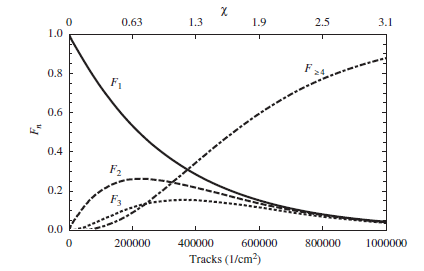

In [156]:
mc = MonteCarloTrackOverlap(framesize=300, diameters_mean=10, diameters_std=0, border=15)
track_densities = np.arange(1, 1e6+2.5e4, 2.5e4) # tracks/cm^2
chi = track_densities * np.pi * (mc.diameters_mean * 1e-4)**2
Farr = mc.run_curve(track_densities, 5)
# Set the first value explicitly: it can be wrong if the one track goes in a border region
Farr[:,0] = 1,0,0,0


Running track density curve:   0%|          | 0/41 [00:00<?, ?it/s]c:\Users\pheu\.virtualenvs\msco\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Running track density curve:  32%|███▏      | 13/41 [00:06<00:07,  3.58it/s]

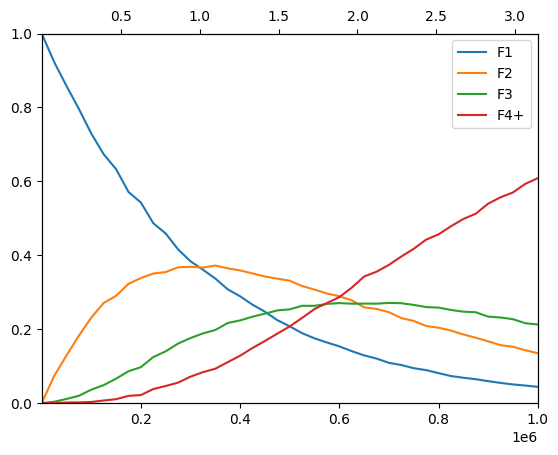

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim(0,1)
ax.set_xlim(np.min(track_densities), np.max(track_densities))

for i,lbl in enumerate(['F1', "F2", "F3", "F4+"]):
    ax.plot(track_densities, Farr[i, :], label=lbl)
    
    
ax2 = ax.twiny()
ax2.set_xlim(np.min(chi), np.max(chi))

ax.legend(loc='upper right')